### Import Packages

In [3537]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Import Datasets

In [2]:
iris = datasets.load_iris() # Classification
wine = datasets.load_wine() # Classification
breast_cancer = datasets.load_breast_cancer() # Classification
boston = datasets.load_boston() # Regression
diabetes = datasets.load_diabetes() # Regression

### Create Necessary Functions

In [3383]:
def predict(X, w):
    return np.dot(X, w)

In [3577]:
def hinge_loss(X, y, w, reg):
    f_x = predict(X, w)
    idx = np.where(f_x * y >= 1)
    rtn = 1 - f_x * y
    rtn[idx] = 0
    rtn + reg * np.linalg.norm(w)
    return np.sum(rtn)

In [790]:
def d_hinge_loss(X, y, w, reg):
    f_x = predict(X, w)
    idx = np.where(f_x * y < 1)
    mult = np.zeros(X.shape) - 2 * reg * w
    mult[idx, :] = X[idx, :]
    return -1 * np.dot(np.transpose(mult), y)

In [3575]:
def distance(X, w):
    return np.abs(np.dot(X, w)) / np.linalg.norm(w)

### Create Plotting Function

In [3570]:
def plot_2dim_db(X, y, w):
    
    plot_color = ['r' if y[i] > 0 else 'b' for i in range(len(y))]

    plt.xlim([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
    plt.ylim([np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1])
    plt.scatter(X[:, 1], X[:, 2], marker='o', color = plot_color)

    dim1_min = np.min([X[:, 1], X[:, 2]])
    dim1_max = np.max([X[:, 1], X[:, 2]])

    dim2_min = -1 * (dim1_min * w[1] + w[0]) / w[2]
    dim2_max = -1 * (dim1_max * w[1] + w[0]) / w[2]

    plt.plot([dim1_min, dim1_max], [dim2_min, dim2_max], color = 'black')
    
    margin = 1/np.linalg.norm(w)
    
    margin_plus_min = -1 * (dim1_min * w[1] + w[0] + margin) / w[2]
    margin_plus_max = -1 * (dim1_max * w[1] + w[0] + margin) / w[2]
    
    plt.plot([dim1_min, dim1_max], [margin_plus_min, margin_plus_max], color = 'grey', linestyle = 'dashed')
    
    margin_minus_min = -1 * (dim1_min * w[1] + w[0] - margin) / w[2]
    margin_minus_max = -1 * (dim1_max * w[1] + w[0] - margin) / w[2]
    
    plt.plot([dim1_min, dim1_max], [margin_minus_min, margin_minus_max], color = 'grey', linestyle = 'dashed')

### Inititalize Variables

In [3572]:
train_X, test_X, train_y, test_y = train_test_split(breast_cancer['data'][:,0:2], breast_cancer['target'],
                                                    test_size = .3, random_state = 0)

scale = StandardScaler().fit(train_X)
train_X = scale.transform(train_X)
test_X = scale.transform(test_X)

# train_X = np.array([[0,0],
#                     [1, 1],
#                     [0, 1],
#                     [0, 3],
#                     [2, 2],
#                     [3, 3],
#                     [3, 2],
#                     [4, 0],
#                     [0, -2]])


# train_y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

train_y = train_y * 2 - 1
test_y = test_y * 2 - 1

train_X = np.insert(train_X, 0, 1, axis = 1)
test_X = np.insert(test_X, 0, 1, axis = 1)

w = np.ones(shape = train_X.shape[1])
# w = np.array([1, -1, 1])
lr = .00001

reg = .01

### Train Model

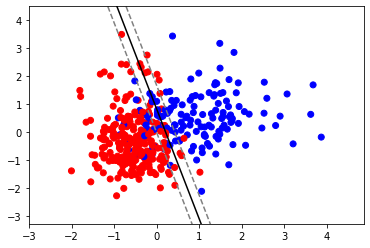

In [3573]:
for _ in range(1000000):
    d_hinge = d_hinge_loss(train_X, train_y, w, reg)

    # print(w)
    # print(hinge_loss(train_X, train_y, w, reg))
    # print(d_hinge)

    w = w - lr * d_hinge[0:len(w)]

plot_2dim_db(train_X, train_y, w)


### Calculate Accuracy

0.9064327485380117

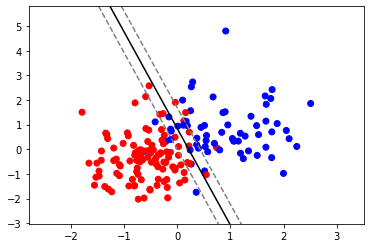

In [3574]:
plot_2dim_db(test_X, test_y, w)
np.mean(np.sign(predict(test_X, w)) == test_y)


### Observation distance from decision boundary

In [3576]:
distance(test_X, w)

array([0.33249657, 0.10870547, 0.45028774, 0.24154669, 0.5518138 ,
       0.98700603, 0.56150491, 0.86299887, 1.54190828, 1.49803229,
       0.37069649, 0.19232527, 1.32219005, 0.51434452, 0.31092008,
       0.28844972, 1.57693164, 1.96692516, 1.44703846, 1.83430024,
       0.84978247, 0.31596759, 0.68816955, 0.83588199, 1.45783778,
       1.27720683, 1.43041601, 0.1243194 , 0.53926617, 1.13800628,
       0.92034257, 1.40126318, 0.38840012, 0.45528053, 1.79454876,
       0.33030231, 0.56953469, 1.05277627, 0.15437358, 0.41339537,
       0.66232538, 1.81773382, 0.51677919, 1.38720439, 0.39732833,
       1.93022891, 1.93262172, 0.12388224, 0.93357656, 0.37507719,
       1.43880085, 0.20877639, 1.08132027, 0.93284004, 0.61716578,
       1.10211333, 0.50171547, 0.08350988, 0.65460312, 1.89930692,
       0.1322925 , 0.32205231, 1.30276108, 0.7220575 , 0.93914626,
       0.25022602, 1.96014562, 1.82598574, 1.65700791, 1.34304207,
       0.29371061, 0.39754983, 1.15262276, 0.14476422, 0.88449